<a href="https://colab.research.google.com/github/celinka12/Data-Mining/blob/main/AFL_2_CoronaVirus_Celinka_Valencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AFL 2 Corona Virus

In [ ]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

## Data Cleaning

In [ ]:
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/COVID-19%20Coronavirus.csv'
df = pd.read_csv(url)

# Display 10 sample rows from the dataset
df.sample(10)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
75,Georgia,Georgia,GEO,3975762,Asia,1649222,16756,414819,4215,1.015994
38,Cayman Islands,Cayman Islands,CYM,67073,Latin America and the Caribbean,20606,24,307218,358,0.116471
219,Vietnam,Viet Nam,VNM,98871712,Asia,9818328,42600,99304,431,0.433882
132,Moldova,Republic of Moldova,MDA,4017550,Europe,514199,11446,127988,2849,2.225986
208,Turks and Caicos,Turks and Caicos Islands,TCAÂ,39634,Latin America and the Caribbean,5910,36,149114,908,0.609137
29,Bulgaria,Bulgaria,BGR,6856886,Europe,1140679,36568,166355,5333,3.205810
70,France,France,FRA,65526369,Europe,25997852,142506,396754,2175,0.548145
129,Mayotte,Mayotte,MYTÂ,284330,Africa,36891,187,129747,658,0.506899
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
216,Vanuatu,Vanuatu,VUT,319701,Oceania,4107,2,12846,6,0.048697


In [ ]:
# describe data
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [ ]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


### Data Cleaning

Check if there are any missing values in the data.

Check the percentage of null values.

Perform label encoding.

Apply feature scaling to the data.

In [ ]:
# Check for null values in the dataset
df.isnull().sum()

,0
Country,0
Other names,1
ISO 3166-1 alpha-3 CODE,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [ ]:
# Check the percentage of null values
df.isnull().sum() / len(df) * 100

,0
Country,0.000000
Other names,0.444444
ISO 3166-1 alpha-3 CODE,0.000000
Population,0.000000
Continent,0.000000
Total Cases,0.000000
Total Deaths,0.000000
Tot Cases//1M pop,0.000000
Tot Deaths/1M pop,0.000000
Death percentage,0.000000


In [ ]:
# Dropping unnecessary columns
df = df.drop('Country', axis=1)
df = df.drop('Other names', axis=1)
df = df.drop('ISO 3166-1 alpha-3 CODE', axis=1)

# Since, country, other names, and country code is not an important column, we can just drop the whole column

In [ ]:
df.isnull().sum()

,0
Population,0
Continent,0
Total Cases,0
Total Deaths,0
Tot Cases//1M pop,0
Tot Deaths/1M pop,0
Death percentage,0


In [ ]:
# Checks for duplicate rows in the DataFrame df and returns the total count of duplicate rows
df.duplicated().sum()

0

In [ ]:
# Extracts all unique values from the "Continent" column of the DataFrame df and counts how many unique continents are present
unique_values = df['Continent'].unique()
print(unique_values)
print(len(unique_values))

['Asia' 'Europe' 'Africa' 'Latin America and the Caribbean' 'Oceania'
 'Northern America']
6


In [ ]:
# Rename the column "Tot Cases//1M pop" to "TotalCasesPer1MPopulation"
# Rename the column "Tot Deaths/1M pop" to "TotalDeathsPer1MPopulation"

df.rename(columns={df.columns[4]: 'TotalCasesPer1MPopulation'}, inplace=True)
df.rename(columns={df.columns[5]: 'TotalDeathsPer1MPopulation'}, inplace=True)

# Check column names after the change
print(df.columns)

Index(['Population', 'Continent', 'Total Cases', 'Total Deaths',
       'TotalCasesPer1MPopulation', 'TotalDeathsPer1MPopulation',
       'Death percentage'],
      dtype='object')


<ipython-input-151-3fb5e7f2ec34>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_cases, x='Continent', y='Total Cases', palette='viridis')


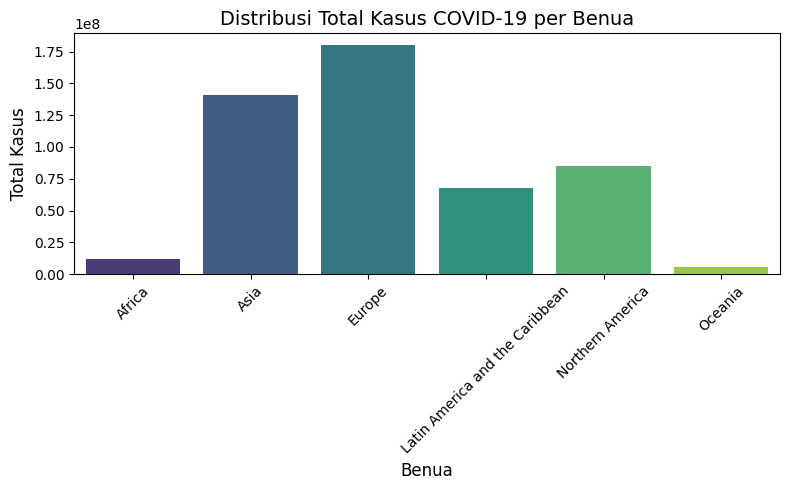

In [ ]:
# Visualisasi Distribusi Total Kasus per Benua
continent_cases = df.groupby('Continent')['Total Cases'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=continent_cases, x='Continent', y='Total Cases', palette='viridis')
plt.title('Distribusi Total Kasus COVID-19 per Benua', fontsize=14)
plt.xlabel('Benua', fontsize=12)
plt.ylabel('Total Kasus', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

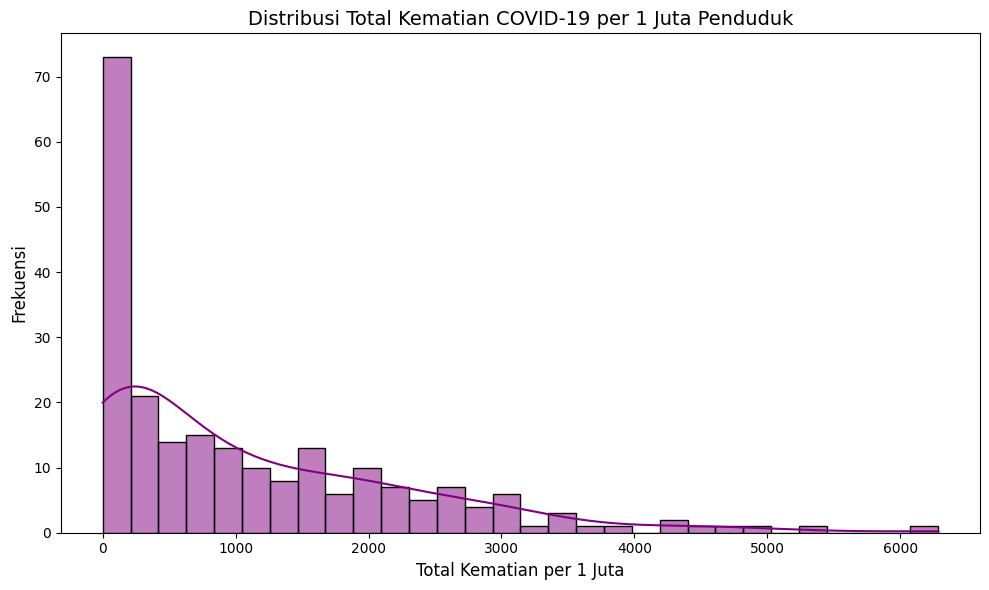

In [ ]:
# Visualisasi Distribusi Total Kematian per 1 Juta Penduduk
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalDeathsPer1MPopulation'], bins=30, kde=True, color='purple')
plt.title('Distribusi Total Kematian COVID-19 per 1 Juta Penduduk', fontsize=14)
plt.xlabel('Total Kematian per 1 Juta', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Encoding
le = LabelEncoder()
df['Continent'] = le.fit_transform(df['Continent'])

df.head(10)

,Population,Continent,Total Cases,Total Deaths,TotalCasesPer1MPopulation,TotalDeathsPer1MPopulation,Death percentage
0,40462186,1,177827,7671,4395,190,4.313743
1,2872296,2,273870,3492,95349,1216,1.275058
2,45236699,0,265691,6874,5873,152,2.587216
3,77481,2,40024,153,516565,1975,0.382271
4,34654212,0,99194,1900,2862,55,1.915438
5,15237,3,2700,9,177200,591,0.333333
6,99348,3,7493,135,75422,1359,1.801682
7,45921761,3,9041124,128065,196881,2789,1.416472
8,2972939,1,422574,8617,142140,2898,2.039169
9,107560,3,34051,212,316577,1971,0.622596


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Population                  225 non-null    int64  
 1   Continent                   225 non-null    int64  
 2   Total Cases                 225 non-null    int64  
 3   Total Deaths                225 non-null    int64  
 4   TotalCasesPer1MPopulation   225 non-null    int64  
 5   TotalDeathsPer1MPopulation  225 non-null    int64  
 6   Death percentage            225 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 12.4 KB


In [ ]:
# Convert float columns to int
for col in df.select_dtypes(include=['float']):
    df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Population                  225 non-null    int64
 1   Continent                   225 non-null    int64
 2   Total Cases                 225 non-null    int64
 3   Total Deaths                225 non-null    int64
 4   TotalCasesPer1MPopulation   225 non-null    int64
 5   TotalDeathsPer1MPopulation  225 non-null    int64
 6   Death percentage            225 non-null    int64
dtypes: int64(7)
memory usage: 12.4 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Select numeric columns to scale
numeric_cols = df.select_dtypes(include=['int64']).columns

# Apply Standard Scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the first few rows of the scaled DataFrame
df.head()

,Population,Continent,Total Cases,Total Deaths,TotalCasesPer1MPopulation,TotalDeathsPer1MPopulation,Death percentage
0,0.038789,-0.509986,-0.276449,-0.204571,-0.915487,-0.759994,1.718056
1,-0.231774,0.168989,-0.263220,-0.247798,-0.287081,0.099982,-0.005106
2,0.073154,-1.188960,-0.264347,-0.212815,-0.905275,-0.791845,0.569282
3,-0.251891,0.168989,-0.295431,-0.282336,2.623123,0.736164,-0.579493
4,-0.003016,-1.188960,-0.287281,-0.264265,-0.926078,-0.873149,-0.005106


# K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

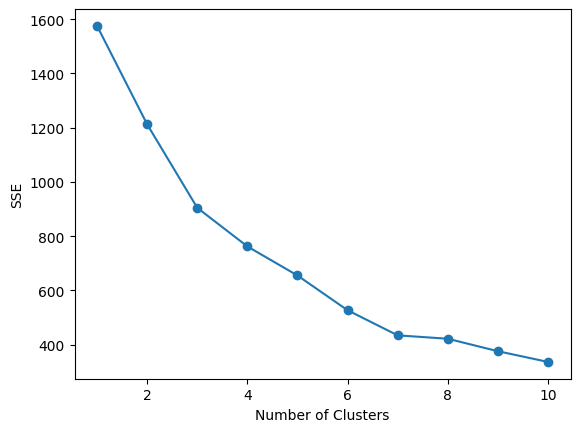

In [ ]:
# set the parameter for evaluating K
sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# choosing best K
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
best_k = findknee.knee
print("the best k for your model is ", best_k)

the best k for your model is  4


Train the K-Means model on the dataset with the number of clusters you have determined.



In [ ]:
kmeans = KMeans(n_clusters=best_k, init='random', max_iter=300, random_state=42)
kmeans.fit(df)
labels = kmeans.labels_

In [ ]:
from sklearn.preprocessing import StandardScaler
df['KMeans'] = kmeans.labels_
# Now inverse transform the scaled numeric columns to retrieve the original values
df[numeric_cols] = scaler.inverse_transform(df[numeric_cols])

# Display the first few rows of the DataFrame to verify the original values for numeric columns
df.head()

,Population,Continent,Total Cases,Total Deaths,TotalCasesPer1MPopulation,TotalDeathsPer1MPopulation,Death percentage,KMeans
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.0,0
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.0,3
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.0,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.0,1
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.0,0


**Display the cluster summary in the form of a dataframe:**

For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).

For continuous columns: mean.

Cluster results: count.

In [ ]:
# Aggregation function for mode
def mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

# Dictionary for aggregation methods with min, max, and mode for categorical columns
# Corrected the column names in agg_dict to match the actual column names in the DataFrame
agg_dict = {
    'Population': ['mean', 'min', 'max'],
    'Continent': [mode, 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'TotalCasesPer1MPopulation': ['mean', 'min', 'max'],
    'TotalDeathsPer1MPopulation': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max'],
}

# Grouping and aggregating the data
agg_result = df.groupby('KMeans').agg(agg_dict)

# Flattening MultiIndex columns for better readability
agg_result.columns = [f"{col[0]} ({col[1]})" if col[1] else col[0] for col in agg_result.columns]

# Transposing the result to swap rows and columns
agg_result_transposed = agg_result.transpose()

# Displaying the transposed result as a styled DataFrame for better visualization
agg_result_styled = agg_result_transposed.style.format(precision=2)

# Display the styled DataFrame
agg_result_styled

KMeans,0,1,2,3
Population (mean),48236018.87,16728442.82,651119826.33,4559362.05
Population (min),6109.00,9930.00,215204501.00,805.00
Population (max),1439323776.00,146044010.00,1403754381.00,38321435.00
Continent (mode),0.00,2.00,1.00,3.00
Continent (min),0.00,0.00,1.00,2.00
Continent (max),1.00,3.00,4.00,5.00
Total Cases (mean),757415.04,3452822.76,51622637.33,364101.72
Total Cases (min),2.00,4150.00,29999816.00,1.00
Total Cases (max),9818328.00,25997852.00,81839052.00,4680816.00
Total Deaths (mean),10291.11,39560.17,729959.67,3794.91


In [ ]:
# count data from each cluster
df['KMeans'].value_counts().sort_index()

,count
KMeans,
0,93
1,71
2,3
3,58


<ipython-input-163-06a2362aca22>:15: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "TotalCasesPer1MPopulation", y = "TotalDeathsPer1MPopulation", hue=labels, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)


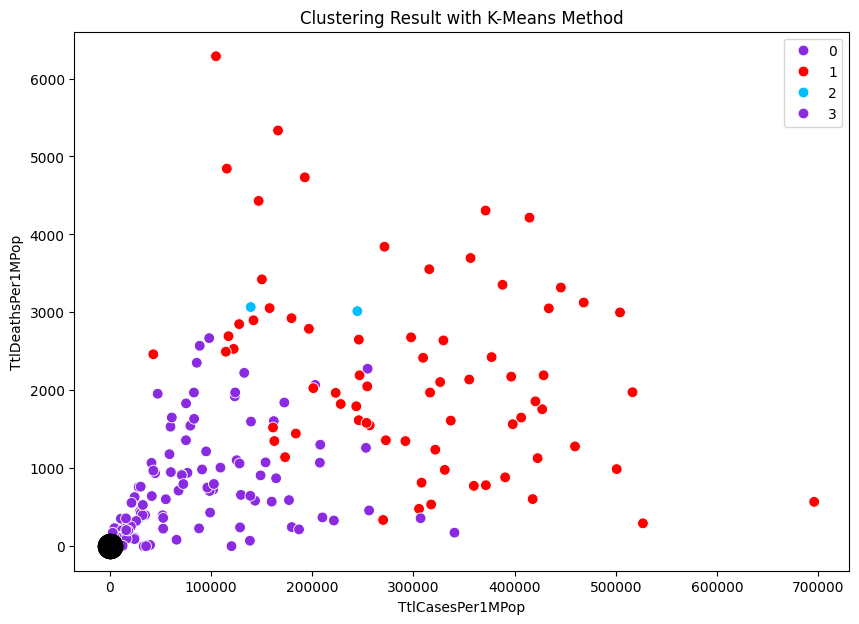

In [ ]:
# plt.figure(figsize=(10, 8))
# for cluster_id in range(best_k):
#     cluster_data = df[df['KMeans'] == cluster_id]
#     plt.scatter(cluster_data['Total Cases'], cluster_data['Total Deaths'], label=f'Cluster {cluster_id}')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
# plt.title('K-Means Clustering of COVID-19 Data')
# plt.xlabel('Total Cases')
# plt.ylabel('Total Deaths')
# plt.legend()
# plt.show()

# visualize the result using scater chart
plt.figure(figsize=(10,7))
sns.scatterplot(x = "TotalCasesPer1MPopulation", y = "TotalDeathsPer1MPopulation", hue=labels, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=300, c="black")
plt.xlabel("TtlCasesPer1MPop")
plt.ylabel("TtlDeathsPer1MPop")
plt.title("Clustering Result with K-Means Method")
plt.show()

# **Hierarchical Clustering**

Hierarchical clustering uses the agglomerative method.

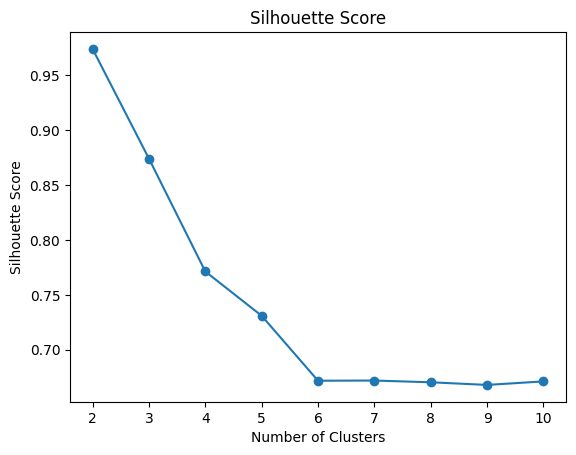

In [ ]:
# The image below is not the final result, if yours looks different, that’s okay.
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    cluster_labels = fcluster(linkage(df, method='ward'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [ ]:
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters = 4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df)

In [ ]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
df['AgglomerativeCluster'] = y_hc

# show the df
df.head()

,Population,Continent,Total Cases,Total Deaths,TotalCasesPer1MPopulation,TotalDeathsPer1MPopulation,Death percentage,KMeans,AgglomerativeCluster
0,40462186.0,1.000000e+00,177827.0,7671.0,4395.0,190.0,4.0,0,1
1,2872296.0,2.000000e+00,273870.0,3492.0,95349.0,1216.0,1.0,3,1
2,45236699.0,2.220446e-16,265691.0,6874.0,5873.0,152.0,2.0,0,0
3,77481.0,2.000000e+00,40024.0,153.0,516565.0,1975.0,0.0,1,1
4,34654212.0,2.220446e-16,99194.0,1900.0,2862.0,55.0,1.0,0,1


In [ ]:
import numpy as np

# Function to calculate mode for each cluster
def mode(series):
    return series.mode().iloc[0] if not series.mode().empty else np.nan

# Repeat for Agglomerative Clustering
agglo_summary = df.groupby(y_hc).agg({
    'Population': ['mean', 'min', 'max'],
    'Continent': [mode, 'min', 'max'],
    'Total Cases': ['mean', 'min', 'max'],
    'Total Deaths': ['mean', 'min', 'max'],
    'TotalCasesPer1MPopulation': ['mean', 'min', 'max'],
    'TotalDeathsPer1MPopulation': ['mean', 'min', 'max'],
    'Death percentage': ['mean', 'min', 'max'],
})

# Display summaries
agglo_summary = agglo_summary.rename_axis('agglo')
agglo_summary

Population                                 Continent                \
               mean           min           max          mode           min   
agglo                                                                         
0      8.116480e+07  4.523670e+07  1.675615e+08  2.220446e-16  2.220446e-16   
1      8.299882e+06  8.050000e+02  4.327383e+07  2.220446e-16  2.220446e-16   
2      2.543333e+08  2.150774e+08  3.344006e+08  1.000000e+00  2.220446e-16   
3      1.421539e+09  1.403754e+09  1.439324e+09  1.000000e+00  1.000000e+00   

             Total Cases                         Total Deaths  ...             \
       max          mean       min         max           mean  ...        max   
agglo                                                          ...              
0      3.0  7.479467e+06   33815.0  25997852.0   84318.962963  ...   369708.0   
1      5.0  6.639092e+05       1.0   7908701.0    7936.696335  ...   212328.0   
2      4.0  2.392796e+07  255468.0  81839052.0  371456.400000  ...  1008222.0   
3      1.0  2.159189e+07  154738.0  43029044.0  263013.000000  ...   521388.0   

      TotalCasesPer1MPopulation                   TotalDeathsPer1MPopulation  \
                           mean     min       max                       mean   
agglo                                                                          
0                  104154.00000   539.0  396754.0                1076.074074   
1                  144220.17801     9.0  696044.0                1102.329843   
2                   82722.20000  1188.0  244734.0                1357.600000   
3                   15380.50000   108.0   30653.0                 187.000000   

                    Death percentage             
        min     max             mean  min   max  
agglo                                            
0      13.0  2789.0         1.444444  0.0   7.0  
1       0.0  6286.0         0.931937  0.0  18.0  
2      15.0  3068.0         1.400000  1.0   2.0  
3       3.0   371.0         1.500000  1.0   2.0  

[4 rows x 21 columns]

In [ ]:
# count data from each cluster
df['AgglomerativeCluster'].value_counts().sort_index()

,count
AgglomerativeCluster,
0,27
1,191
2,5
3,2


# **Hierarchical Visualization**

Single Linkage

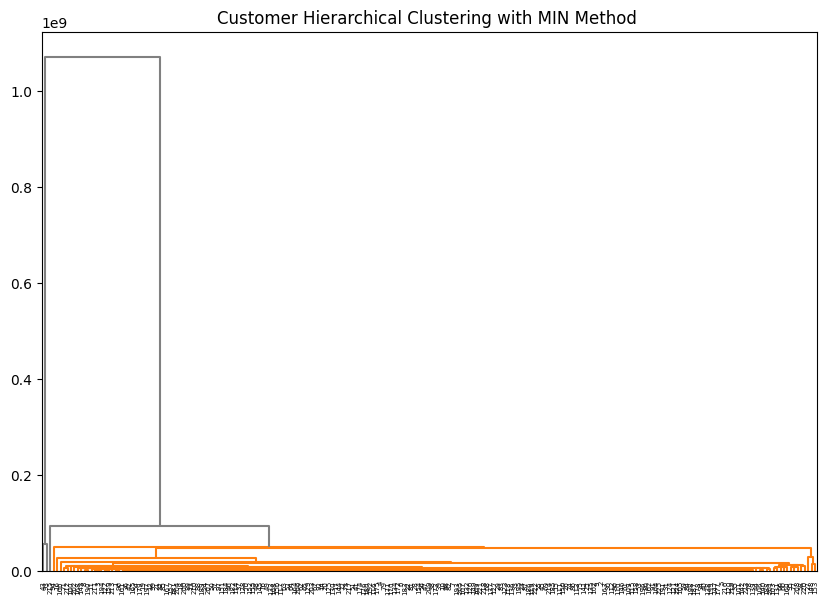

In [ ]:
# Min Distance
# Buat linkage matrix
linked = linkage(df, method='single')

# Tentukan jumlah cluster yang diinginkan
n_clusters = 4

# Gunakan fcluster untuk mendapatkan label cluster
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

# Tentukan color_threshold agar sesuai dengan pemotongan untuk 4 cluster
color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,  # Menentukan ketinggian pemotongan sesuai jumlah cluster
           above_threshold_color='grey',     # Warna cabang di atas threshold
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with MIN Method ")
plt.show()


complete linkage

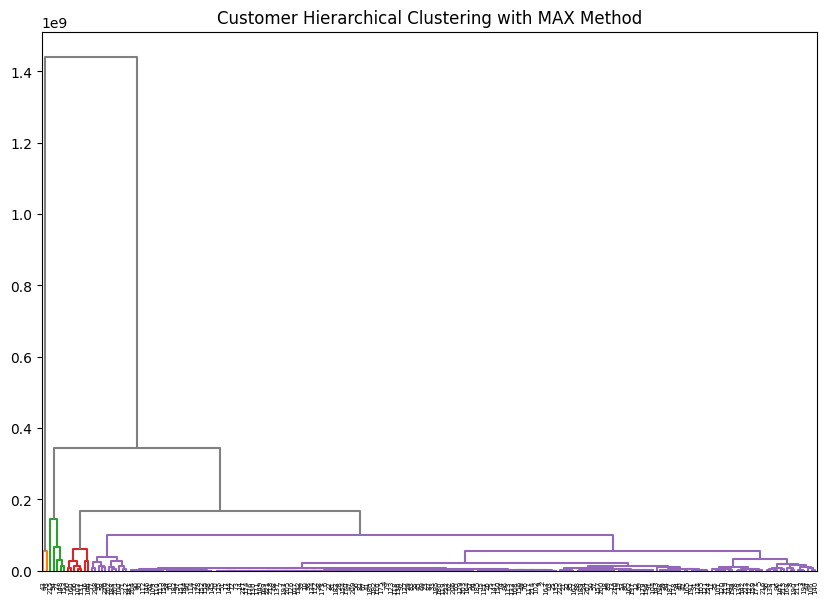

In [ ]:
# Max Distance
n_clusters = 4
linked = linkage(df, method='complete', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with MAX Method")
plt.show()

average linkage

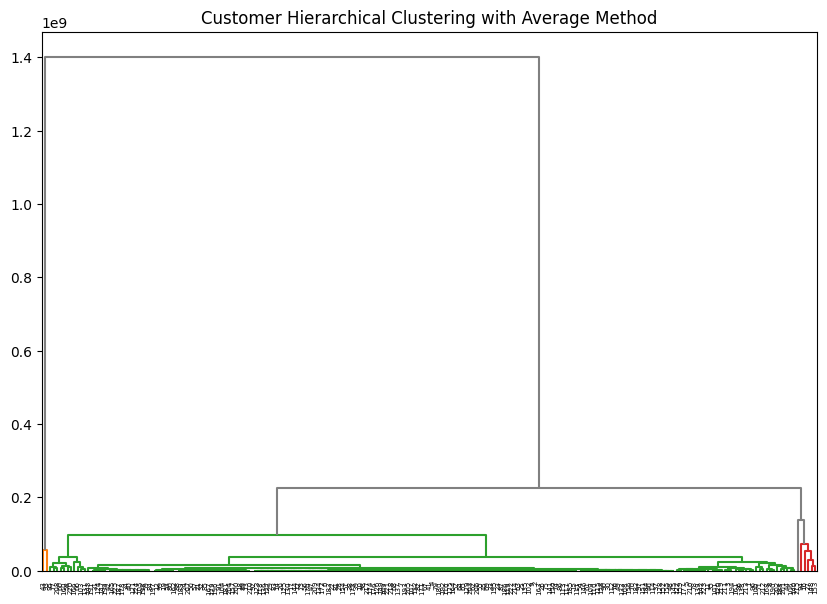

In [ ]:
# Average Distance
n_clusters = 4
linked = linkage(df, method='average', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with Average Method")
plt.show()

ward method

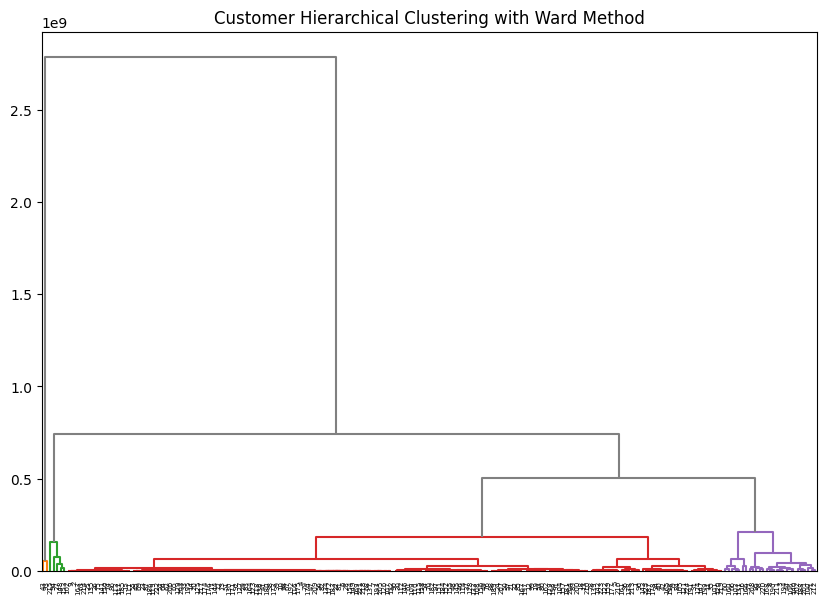

In [ ]:
# Ward Method
n_clusters = 4
linked = linkage(df, method='ward', metric='euclidean')
cluster_labels = fcluster(linked, t=n_clusters, criterion='distance')

color_threshold = linked[-(n_clusters-1), 2]

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked,
           color_threshold=color_threshold,
           above_threshold_color='grey',
           labels=np.arange(1, df.shape[0] + 1))
plt.title("Customer Hierarchical Clustering with Ward Method")
plt.show()